In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
image_size = (64, 64)
batch_size = 64

# Define paths
dataset_path = '/kaggle/input/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train'

# Initialize the data generators without augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize images
    validation_split=0.2 # split for validation data
)

# Setup the training and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical', # for multi-class classification
    subset='training', # set as training data
    shuffle=True # shuffle the training data
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical', # for multi-class classification
    subset='validation', # set as validation data
    shuffle=True # shuffle the validation data
)


2024-03-26 05:53:04.007584: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 05:53:04.007695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 05:53:04.281071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 178472 images belonging to 29 classes.
Found 44602 images belonging to 29 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

# Model architecture
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(32, (3, 3), input_shape=(image_size[0], image_size[1], 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with max pooling
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before passing to the fully-connected layers
model.add(Flatten())

# First fully-connected layer
model.add(Dense(64))
model.add(Activation('relu'))
# Add dropout to prevent overfitting
model.add(Dropout(0.5))

# Output layer with softmax activation for classification
model.add(Dense(len(train_generator.class_indices))) # The number of neurons should equal the number of classes
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model using the training data generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=25, # You can change the number of epochs based on your training requirements
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save('asl_model.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   1/2788 ━━━━━━━━━━━━━━━━━━━━ 10:53:04 14s/step - accuracy: 0.0156 - loss: 3.3703

I0000 00:00:1711432846.592196     138 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711432846.611179     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 756/2788 ━━━━━━━━━━━━━━━━━━━━ 22:09 654ms/step - accuracy: 0.1370 - loss: 2.9692

W0000 00:00:1711433340.655174     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2787/2788 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.3304 - loss: 2.2026

W0000 00:00:1711434776.549243     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2520s 899ms/step - accuracy: 0.3305 - loss: 2.2021 - val_accuracy: 0.7347 - val_loss: 1.1527
Epoch 2/25
   1/2788 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.7188 - loss: 0.7764

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2788/2788 ━━━━━━━━━━━━━━━━━━━━ 2s 630us/step - accuracy: 0.7188 - loss: 0.7764 - val_accuracy: 0.7931 - val_loss: 0.9032
Epoch 3/25


W0000 00:00:1711435354.619126     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2788/2788 ━━━━━━━━━━━━━━━━━━━━ 721s 258ms/step - accuracy: 0.7328 - loss: 0.7690 - val_accuracy: 0.7694 - val_loss: 1.2571
Epoch 4/25
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.8281 - loss: 0.4386 - val_accuracy: 0.7586 - val_loss: 1.5209
Epoch 5/25
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 684s 245ms/step - accuracy: 0.8240 - loss: 0.4962 - val_accuracy: 0.7968 - val_loss: 1.3703
Epoch 6/25
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - accuracy: 0.8281 - loss: 0.4235 - val_accuracy: 0.7241 - val_loss: 2.0236
Epoch 7/25
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 754s 270ms/step - accuracy: 0.8723 - loss: 0.3624 - val_accuracy: 0.7972 - val_loss: 1.3402
Epoch 8/25
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.9375 - loss: 0.2406 - val_accuracy: 0.8621 - val_loss: 0.9419
Epoch 9/25
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 679s 243ms/step - accuracy: 0.8986 - loss: 0.2871 - val_accuracy: 0.7981 - val_loss: 1.3714
Epoch 10/25
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 0.9688 - loss:

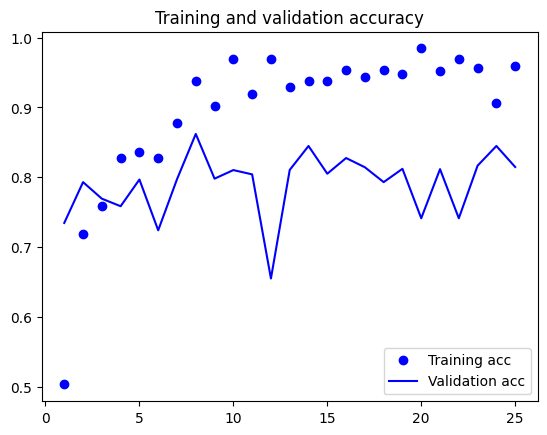

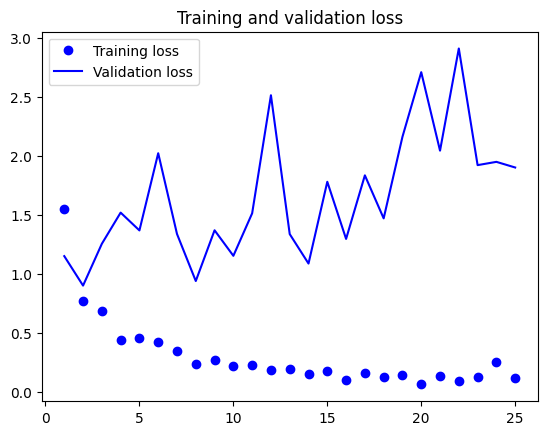

In [4]:
import matplotlib.pyplot as plt

# Assuming you have stored your fitting process in a variable called 'history'
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Loss plot
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
